# Risk Analysis Of Loan Approval

#### Problem Statement:
    1.The problem is to determine whether a loan applicant will default or repay.
    2.The primary objective of approval process is not to reject or accept all applications, as this would lead 
    to,rejecting capable applicants who can repay or approve for customer who cannot repay.
    3.Based on the given data, identify if the client has any difficulty paying the installments.
    4.If a loan is to be approved, do we approve a full requested amount or reduce the amount or offer a better 
      interest rate.
    5.Figure out the driving factors for a loan default. 

#### Approach: How do we go about the problem
    1.Looking at the basic dataset information, I had the question of why we have 122 columns, and I quickly 
      opened the descriptor data to understand what kind of data we have.
    2.After skimming through the data, I realized there are quiet a lot of columns that doesn’t add value. For ex: 
      Documents related columns, apartment related information, escalator info, all these have no intrinsic value 
      in determining defaulters. If a customer doesn’t provide required documents, the application will not get to 
      consideration stage and escalators, no.of entrances practically doesn’t define repayment capability of a 
      customer.
    3.Data like, income, occupation, family details, property details, tax information, education, investment 
      details, past credit activity. All these data may help us better understand the applicant's motive. 
    4.Check for missing values, outliers, identify object columns, int columns, float columns, check for data 
      imbalance, create plots in loop as suggested and draw insights.  
    5.For application data I followed top-down approach instead of directly dropping columns to understand the 
      difference and what I will be left with.

In [1]:
# import all necessary libraries 
import warnings 
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#Read the csv files
#application_data.csv read as dataframe ad

ad=pd.read_csv("application_data.csv")

#previous_application.csv read as dataframe pa

pa=pd.read_csv("previous_application.csv")

#### Application dataset
###### Understand the data, no.of columns and rows, data types 

In [3]:
ad.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

###### There are a lot of columns that are of no use in analysis, so I choose 24 columns, based on my understanding, that would add value to analysis

In [4]:
ad1=ad.iloc[:,np.r_[0:11,12:18,28,29,40,91:95]]
ad1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   FLAG_OWN_CAR                307511 non-null  object 
 5   FLAG_OWN_REALTY             307511 non-null  object 
 6   CNT_CHILDREN                307511 non-null  int64  
 7   AMT_INCOME_TOTAL            307511 non-null  float64
 8   AMT_CREDIT                  307511 non-null  float64
 9   AMT_ANNUITY                 307499 non-null  float64
 10  AMT_GOODS_PRICE             307233 non-null  float64
 11  NAME_INCOME_TYPE            307511 non-null  object 
 12  NAME_EDUCATION_TYPE         307511 non-null  object 
 13  NAME_FAMILY_ST

###### Review data categories in most significant variables and understand what we have in the data before we jump into solving the questions

In [5]:
# Looking into few columns at high level gives us some idea of what we have in those columns. 
ad1.TARGET.value_counts()
ad1.CODE_GENDER.value_counts()
ad1.NAME_CONTRACT_TYPE.value_counts()
ad1.FLAG_OWN_CAR.value_counts()
ad1.FLAG_OWN_REALTY.value_counts()
ad1.CNT_CHILDREN.value_counts()
ad1.NAME_EDUCATION_TYPE.value_counts()
ad1.AMT_INCOME_TOTAL.describe()
ad1.OCCUPATION_TYPE.value_counts()
ad1.CNT_FAM_MEMBERS.value_counts()
ad1.NAME_HOUSING_TYPE.value_counts()
ad1.ORGANIZATION_TYPE.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
16.0         2
12.0         2
20.0         2
11.0         1
13.0         1
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

### First Impressions of data:
    1.Data is imbalanced in Target, FLAG_OWN_REALTY, columns.
    2.Derive age in yrs, age in years would be much easier to understand and bucket the data if needed.
    3.Data in children count seems very high in some instances, do a box plot and check for outliers.
    4.Gender column has invalid values. 
    5.Family member count is also high, check for outliers. 
    6.May be FLAG_OWN_REALTY is not an imbalance as it is not necessary everybody own a house.
    7.Majority of applications seem to be from under paying jobs like drivers, support staff etc.
    8.Also majority of applications are from Business, Self-employed and others. This may be a wrong assumption 
       but a preliminary observation.

## Missing values
##### Missing value percentage across variables
###### Q.Identify the missing data and use appropriate method to deal with it. (Remove columns/or replace it with an appropriate value)

In [6]:
a=ad1.isnull().sum()/ad1.shape[0]*100.0
a[a>0].round(3)

AMT_ANNUITY                  0.004
AMT_GOODS_PRICE              0.090
OCCUPATION_TYPE             31.346
CNT_FAM_MEMBERS              0.001
OBS_30_CNT_SOCIAL_CIRCLE     0.332
DEF_30_CNT_SOCIAL_CIRCLE     0.332
OBS_60_CNT_SOCIAL_CIRCLE     0.332
DEF_60_CNT_SOCIAL_CIRCLE     0.332
dtype: float64

In [7]:
obs3cnt=ad1.OBS_30_CNT_SOCIAL_CIRCLE.mode()[0]
def3cnt=ad1.DEF_30_CNT_SOCIAL_CIRCLE.mode()[0]
obs6cnt=ad1.OBS_60_CNT_SOCIAL_CIRCLE.mode()[0]
def6cnt=ad1.DEF_60_CNT_SOCIAL_CIRCLE.mode()[0]
obs3cnt

0.0

###### Replace the missing values in social circle varibles with mode value

In [8]:
ad1.OBS_30_CNT_SOCIAL_CIRCLE.fillna(obs3cnt, inplace=True)
ad1.DEF_30_CNT_SOCIAL_CIRCLE.fillna(def3cnt, inplace=True)
ad1.OBS_60_CNT_SOCIAL_CIRCLE.fillna(obs6cnt, inplace=True)
ad1.DEF_60_CNT_SOCIAL_CIRCLE.fillna(def6cnt, inplace=True)

In [9]:
ad1.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
OCCUPATION_TYPE               96391
CNT_FAM_MEMBERS                   2
ORGANIZATION_TYPE                 0
OBS_30_CNT_SOCIAL_CIRCLE          0
DEF_30_CNT_SOCIAL_CIRCLE          0
OBS_60_CNT_SOCIAL_CIRCLE          0
DEF_60_CNT_SOCIAL_CIRCLE          0
dtype: int64

###### Missing values in AMT_GOODS_PRICE, AMT_ANNUITY, CNT_FAM_MEMBERS are =< 0.09%. Dropping or keeping these records wont harm us in any way shape or form, however in order to keep the final dataset clean for analysis. I would prefer to drop these records. 

In [10]:
ad2=ad1[~ad1.AMT_GOODS_PRICE.isnull()].copy()
ad3=ad2[~ad2.AMT_ANNUITY.isnull()].copy()

In [11]:
ad3.shape

(307221, 24)

In [12]:
ad3.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       0
AMT_GOODS_PRICE                   0
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
OCCUPATION_TYPE               96334
CNT_FAM_MEMBERS                   0
ORGANIZATION_TYPE                 0
OBS_30_CNT_SOCIAL_CIRCLE          0
DEF_30_CNT_SOCIAL_CIRCLE          0
OBS_60_CNT_SOCIAL_CIRCLE          0
DEF_60_CNT_SOCIAL_CIRCLE          0
dtype: int64

In [13]:
96391-96334
float(100.0*96334/307221)

57

31.356580442092174

###### Dropping few missing records celared all the missing values except for the big chunk, now lets figure out a way to solve this. 
    >>> Dropping the records may not work in this case as missing percentage is significantly high.
    >>> Assigning Laborers to the missing values will create data imbalance.
    >>> So it is ideal to create a new category 'unknown' as we truly dont know the category. 

In [14]:
ad3.OCCUPATION_TYPE.describe()
ad3.OCCUPATION_TYPE.value_counts()

count       210887
unique          18
top       Laborers
freq         55132
Name: OCCUPATION_TYPE, dtype: object

Laborers                 55132
Sales staff              32063
Core staff               27530
Managers                 21347
Drivers                  18589
High skill tech staff    11370
Accountants               9801
Medicine staff            8527
Security staff            6712
Cooking staff             5939
Cleaning staff            4648
Private service staff     2648
Low-skill Laborers        2092
Waiters/barmen staff      1346
Secretaries               1304
Realty agents              751
HR staff                   563
IT staff                   525
Name: OCCUPATION_TYPE, dtype: int64

In [15]:
ad3.OCCUPATION_TYPE.fillna('unknown', inplace=True)

In [16]:
#Check if the changes are reflecting appropriately
ad3.OCCUPATION_TYPE.value_counts()

unknown                  96334
Laborers                 55132
Sales staff              32063
Core staff               27530
Managers                 21347
Drivers                  18589
High skill tech staff    11370
Accountants               9801
Medicine staff            8527
Security staff            6712
Cooking staff             5939
Cleaning staff            4648
Private service staff     2648
Low-skill Laborers        2092
Waiters/barmen staff      1346
Secretaries               1304
Realty agents              751
HR staff                   563
IT staff                   525
Name: OCCUPATION_TYPE, dtype: int64

### Review the datatypes

In [17]:
ad3.info()
ad3.DAYS_BIRTH.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307221 entries, 0 to 307510
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307221 non-null  int64  
 1   TARGET                      307221 non-null  int64  
 2   NAME_CONTRACT_TYPE          307221 non-null  object 
 3   CODE_GENDER                 307221 non-null  object 
 4   FLAG_OWN_CAR                307221 non-null  object 
 5   FLAG_OWN_REALTY             307221 non-null  object 
 6   CNT_CHILDREN                307221 non-null  int64  
 7   AMT_INCOME_TOTAL            307221 non-null  float64
 8   AMT_CREDIT                  307221 non-null  float64
 9   AMT_ANNUITY                 307221 non-null  float64
 10  AMT_GOODS_PRICE             307221 non-null  float64
 11  NAME_INCOME_TYPE            307221 non-null  object 
 12  NAME_EDUCATION_TYPE         307221 non-null  object 
 13  NAME_FAMILY_ST

count    307221.000000
mean     -16038.787130
std        4363.852714
min      -25229.000000
25%      -19684.000000
50%      -15753.000000
75%      -12415.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

###### DAYS_BIRTH column has negative values, we need to convert them to positive numbers and derive the age in years for better understanding.


In [18]:
ad3['Age']=ad3['DAYS_BIRTH'].abs()/365
ad3.Age.head(10)
ad3.Age=ad3.Age.round().astype("int64")
ad3=ad3.drop(['DAYS_BIRTH'],axis=1)

0    25.920548
1    45.931507
2    52.180822
3    52.068493
4    54.608219
5    46.413699
6    37.747945
7    51.643836
8    55.065753
9    39.641096
Name: Age, dtype: float64

In [19]:
ad3.Age.tail(-202120)

202293    68
202294    50
202295    59
202296    62
202297    33
          ..
307506    26
307507    57
307508    41
307509    33
307510    46
Name: Age, Length: 105101, dtype: int64

In [20]:
ad3.CODE_GENDER.value_counts()

F      202251
M      104966
XNA         4
Name: CODE_GENDER, dtype: int64

###### I think its ok to ignore 'XNA' records from gender column, as there are just about 4 records 

## Check for outliers in the data
###### Recall, In our first impressions we observed, count of children and family members is concerning. Since we already know there is something dubious, lets first check these variables and get back to others to see if we can find anything. 

###### Q. Identify if there are outliers in the dataset. Also, mention why do you think it is an outlier. Again, remember that for this exercise, it is not necessary to remove any data points.

In [21]:
ad3.CNT_CHILDREN.describe()
ad3.CNT_FAM_MEMBERS.describe()

count    307221.000000
mean          0.416977
std           0.722047
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

count    307221.000000
mean          2.152626
std           0.910623
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

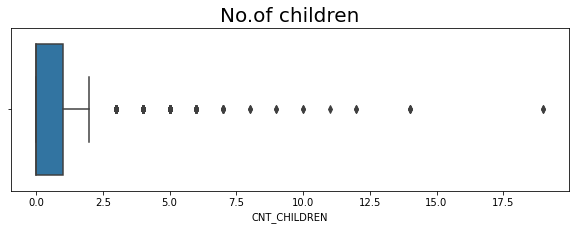

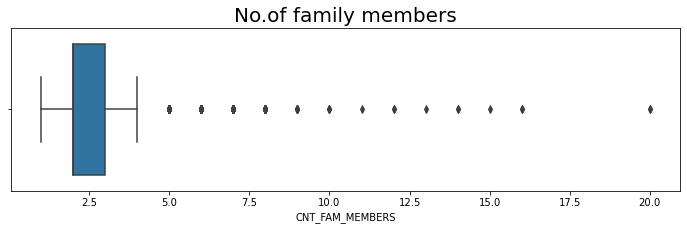

In [22]:
plt.figure(figsize=[10,3])
z=sns.boxplot(ad3.CNT_CHILDREN)
z.axes.set_title("No.of children", fontsize=20)
plt.show()

plt.figure(figsize=[12,3])

y=sns.boxplot(ad3.CNT_FAM_MEMBERS)
y.axes.set_title("No.of family members", fontsize=20)
plt.show();

In [23]:
ad3[ad3.CNT_CHILDREN>5].describe()
ad3.CNT_CHILDREN.quantile([0.5,0.7,0.9,0.95,0.99,0.999])
ad3.CNT_CHILDREN.value_counts()
ad3[ad3.CNT_FAM_MEMBERS>6].describe()
ad3.CNT_FAM_MEMBERS.quantile([0.5,0.7,0.9,0.95,0.99,0.999])

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,Age
count,42.000000,42.000000,42.000000,42.000000,4.200000e+01,42.000000,4.200000e+01,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,266110.309524,0.214286,8.190476,147910.714286,5.103762e+05,24899.357143,4.408929e+05,0.016367,10.023810,1.452381,0.190476,1.404762,0.142857,41.285714
std,104452.250594,0.415300,3.458733,72786.394413,3.233310e+05,12354.971673,2.735790e+05,0.011666,3.316537,1.755860,0.551632,1.697337,0.417392,7.249174
min,103596.000000,0.000000,6.000000,45000.000000,8.634600e+04,5301.000000,7.650000e+04,0.002042,7.000000,0.000000,0.000000,0.000000,0.000000,28.000000
25%,161198.500000,0.000000,6.000000,103500.000000,2.271240e+05,15687.000000,2.025000e+05,0.007496,8.000000,0.000000,0.000000,0.000000,0.000000,36.500000
50%,287494.500000,0.000000,6.500000,126000.000000,4.940280e+05,23766.750000,4.500000e+05,0.013462,8.000000,1.000000,0.000000,1.000000,0.000000,41.000000
75%,320264.500000,0.000000,9.000000,193500.000000,7.529625e+05,30528.000000,6.750000e+05,0.018796,10.750000,2.000000,0.000000,2.000000,0.000000,46.750000
max,453499.000000,1.000000,19.000000,337500.000000,1.288350e+06,59094.000000,1.125000e+06,0.046220,20.000000,6.000000,2.000000,6.000000,2.000000,61.000000


0.500    0.0
0.700    0.0
0.900    2.0
0.950    2.0
0.990    3.0
0.999    4.0
Name: CNT_CHILDREN, dtype: float64

0     215182
1      61051
2      26724
3       3711
4        427
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,Age
count,121.000000,121.000000,121.000000,121.000000,1.210000e+02,121.000000,1.210000e+02,121.000000,121.000000,121.000000,121.000000,121.000000,121.00000,121.000000
mean,264793.561983,0.123967,6.107438,167729.504132,5.535197e+05,27038.417355,4.848843e+05,0.019024,8.049587,1.380165,0.173554,1.347107,0.14876,40.396694
std,102358.603417,0.330914,2.532461,101767.542983,3.664159e+05,13738.424300,3.251450e+05,0.012650,2.418165,2.130165,0.557938,2.112308,0.51090,7.213967
min,103596.000000,0.000000,5.000000,36000.000000,5.094000e+04,5089.500000,4.500000e+04,0.001417,7.000000,0.000000,0.000000,0.000000,0.00000,28.000000
25%,174660.000000,0.000000,5.000000,112500.000000,2.520000e+05,16551.000000,2.250000e+05,0.009175,7.000000,0.000000,0.000000,0.000000,0.00000,35.000000
50%,263382.000000,0.000000,5.000000,135000.000000,4.725000e+05,24669.000000,4.500000e+05,0.018209,7.000000,0.000000,0.000000,0.000000,0.00000,39.000000
75%,346545.000000,0.000000,6.000000,211500.000000,7.726860e+05,34861.500000,6.750000e+05,0.028663,8.000000,2.000000,0.000000,2.000000,0.00000,44.000000
max,455557.000000,1.000000,19.000000,810000.000000,1.546020e+06,67500.000000,1.350000e+06,0.072508,20.000000,9.000000,4.000000,9.000000,4.00000,61.000000


0.500    2.0
0.700    2.0
0.900    3.0
0.950    4.0
0.990    5.0
0.999    6.0
Name: CNT_FAM_MEMBERS, dtype: float64

###### I initially taught the children and family counts have outliers, however they dont seem to be outliers as the values are continuous. Although practically it doesnt make sense to have 19 children. The other variables like income and social metrics seem to have data, in practical a bank may not want to risk its capital even though there is regualr income. We have to futher correlate and understand applicants repayment behaviour .

In [24]:
ad3.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,Age
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,House / apartment,0.018801,Laborers,1.0,Business Entity Type 3,2.0,2.0,2.0,2.0,26
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,House / apartment,0.003541,Core staff,2.0,School,1.0,0.0,1.0,0.0,46
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,House / apartment,0.010032,Laborers,1.0,Government,0.0,0.0,0.0,0.0,52
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,House / apartment,0.008019,Laborers,2.0,Business Entity Type 3,2.0,0.0,2.0,0.0,52
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,House / apartment,0.028663,Core staff,1.0,Religion,0.0,0.0,0.0,0.0,55


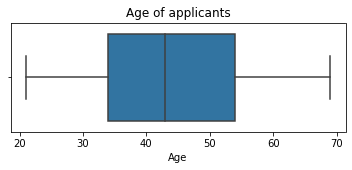

In [25]:
#df.head().set_option('display.max_columns', None)
ad3.Age.describe()
plt.figure(figsize=[6,2])
sns.boxplot(ad3.Age).set(title="Age of applicants")
plt.show();

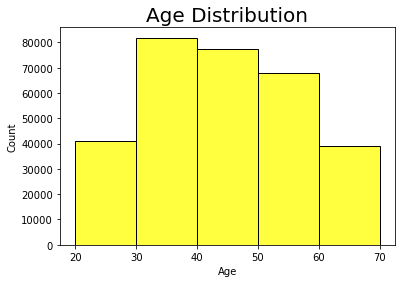

In [26]:
x=sns.histplot(ad3['Age'],bins=[20,30,40,50,60,70],color='yellow')
plt.title('Age Distribution',fontsize=20)
plt.show();

###### Lets analyze some more variables to see if there are any outliers

In [27]:
ad3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307221 entries, 0 to 307510
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307221 non-null  int64  
 1   TARGET                      307221 non-null  int64  
 2   NAME_CONTRACT_TYPE          307221 non-null  object 
 3   CODE_GENDER                 307221 non-null  object 
 4   FLAG_OWN_CAR                307221 non-null  object 
 5   FLAG_OWN_REALTY             307221 non-null  object 
 6   CNT_CHILDREN                307221 non-null  int64  
 7   AMT_INCOME_TOTAL            307221 non-null  float64
 8   AMT_CREDIT                  307221 non-null  float64
 9   AMT_ANNUITY                 307221 non-null  float64
 10  AMT_GOODS_PRICE             307221 non-null  float64
 11  NAME_INCOME_TYPE            307221 non-null  object 
 12  NAME_EDUCATION_TYPE         307221 non-null  object 
 13  NAME_FAMILY_ST

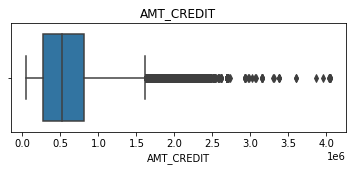

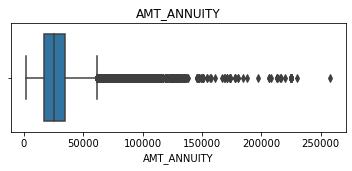

In [28]:
plt.figure(figsize=[6,2])
sns.boxplot(ad3.AMT_CREDIT).set(title="AMT_CREDIT")
plt.show()

plt.figure(figsize=[6,2])
sns.boxplot(ad3.AMT_ANNUITY).set(title="AMT_ANNUITY")
plt.show();

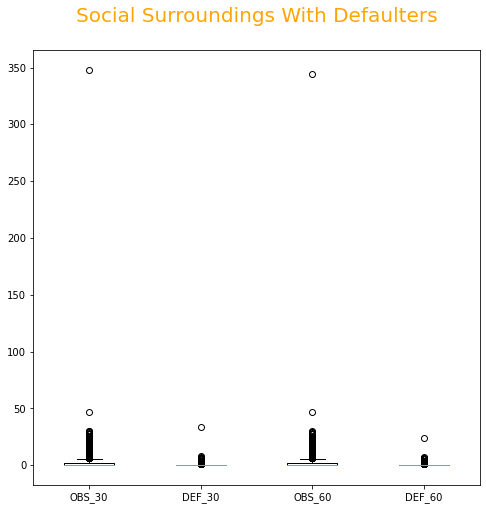

In [29]:
plt.figure(figsize = [8,8])
plt.boxplot([ad3['OBS_30_CNT_SOCIAL_CIRCLE'], ad3['DEF_30_CNT_SOCIAL_CIRCLE'], ad3['OBS_60_CNT_SOCIAL_CIRCLE'], ad3['DEF_60_CNT_SOCIAL_CIRCLE']])
plt.xticks((1,2,3,4), ['OBS_30', 'DEF_30', 'OBS_60','DEF_60'])
plt.title("Social Surroundings With Defaulters\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'orange'})
plt.show();

In [30]:
ad3.OBS_30_CNT_SOCIAL_CIRCLE.quantile([0.5,0.7,0.95,0.99])
ad3.DEF_30_CNT_SOCIAL_CIRCLE.quantile([0.5,0.7,0.95,0.99])
ad3.OBS_60_CNT_SOCIAL_CIRCLE.quantile([0.5,0.7,0.95,0.99])
ad3.DEF_60_CNT_SOCIAL_CIRCLE.quantile([0.5,0.7,0.95,0.99])

0.50     0.0
0.70     2.0
0.95     6.0
0.99    10.0
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

0.50    0.0
0.70    0.0
0.95    1.0
0.99    2.0
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

0.50     0.0
0.70     2.0
0.95     6.0
0.99    10.0
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

0.50    0.0
0.70    0.0
0.95    1.0
0.99    2.0
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [31]:
ad3[ad3.OBS_30_CNT_SOCIAL_CIRCLE>10].describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,Age
count,2779.000000,2779.000000,2779.000000,2.779000e+03,2.779000e+03,2779.000000,2.779000e+03,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000
mean,279223.965455,0.090680,0.426772,1.621662e+05,5.961717e+05,26844.613170,5.392245e+05,0.020999,2.204030,13.382872,0.488305,13.260166,0.286434,44.190716
std,102093.967699,0.287205,0.714916,8.610839e+04,3.849307e+05,13545.950786,3.571310e+05,0.011083,0.893403,6.980344,1.126353,6.916683,0.856096,12.609476
min,100137.000000,0.000000,0.000000,3.150000e+04,4.500000e+04,4207.500000,4.500000e+04,0.000533,1.000000,11.000000,0.000000,8.000000,0.000000,21.000000
25%,193442.000000,0.000000,0.000000,1.125000e+05,2.790000e+05,16773.750000,2.475000e+05,0.011657,2.000000,11.000000,0.000000,11.000000,0.000000,33.000000
50%,275831.000000,0.000000,0.000000,1.350000e+05,5.212800e+05,24885.000000,4.500000e+05,0.019689,2.000000,12.000000,0.000000,12.000000,0.000000,43.000000
75%,369328.000000,0.000000,1.000000,2.025000e+05,8.086500e+05,34555.500000,6.795000e+05,0.028663,3.000000,14.000000,1.000000,14.000000,0.000000,55.000000
max,456238.000000,1.000000,4.000000,1.350000e+06,2.250000e+06,145485.000000,2.250000e+06,0.072508,6.000000,348.000000,34.000000,344.000000,24.000000,69.000000


###### Interestingly, the social surroundings defaulters seem to have some outliers, at the same time this is valuable information about defaults which might give us some insights. Keeping in mind these are outliers, our analysis must focus on percentiles instead of mean and medians. For instance, in DEF_30&60, the 99th percentile is still at 2 and outliers are way beyond the 99th percentile. 


## Univariate Analysis

#### We found some intereseting insights from numeric data, lets also check the object data types and find what information they give us. Untill this point we have picked columns based on our preliminary analysis. Now lets look at the big picture and try to plot all the object data types together. 
###### Hint: How will you analyse the data in case of data imbalance? You can plot more than one type of plot to analyse the different aspects due to data imbalance. For example, you can choose your own scale for the graphs, i.e. one can plot in terms of percentage or absolute value. Do this analysis for the ‘Target variable’ in the dataset ( clients with payment difficulties and all other cases). Use a mix of univariate and bivariate analysis etc.

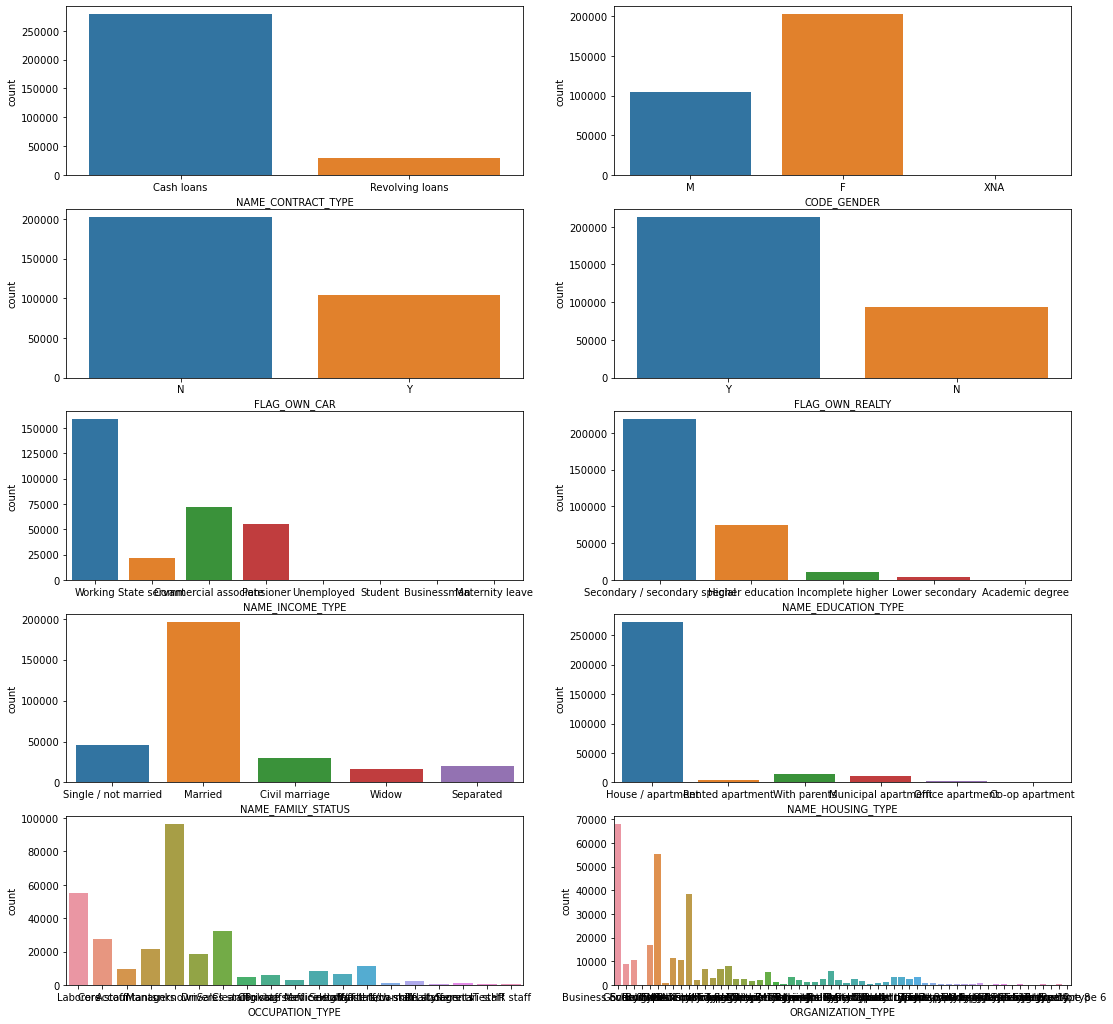

In [32]:
# lets find all the object columns in our data and plot them together to save time plotting individual objects. 
x=ad3.select_dtypes(include='object')
plt.figure(figsize = [18,18])
ncols=5
nrows=2
count=1
for i in x.columns:
    plt.subplot(ncols,nrows,count)
    sns.countplot(x[i])
    count=count+1
plt.show();

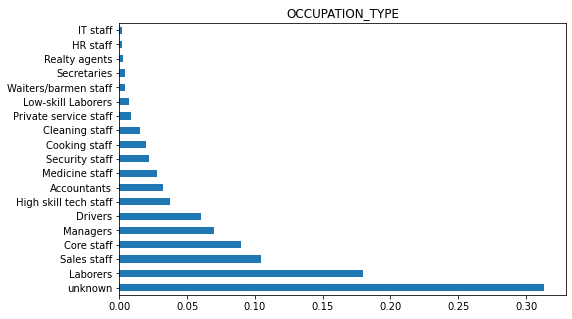

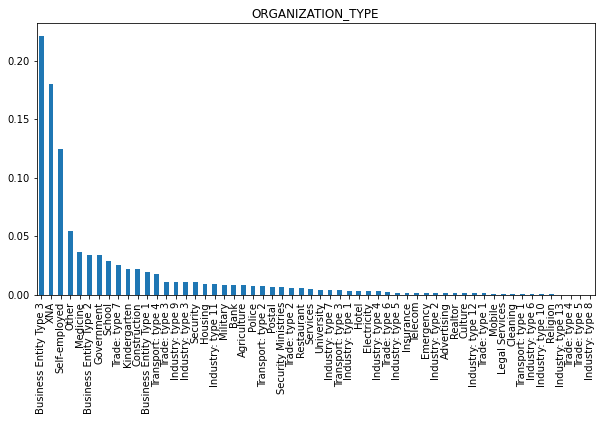

In [33]:
# Plot occupation and organization types further more
plt.figure(figsize = [8,5])
ad3.OCCUPATION_TYPE.value_counts(normalize=True).plot.barh()
plt.title("OCCUPATION_TYPE")
plt.show()

plt.figure(figsize = [10,5])
ad3.ORGANIZATION_TYPE.value_counts(normalize=True).plot.bar()
plt.title("ORGANIZATION_TYPE")
plt.show();

#### Lets do some more sanity checks and see if any changes are to be made in the data.

In [34]:
# Lets change gender column to numeric format
ad3

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,Age
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,House / apartment,0.018801,Laborers,1.0,Business Entity Type 3,2.0,2.0,2.0,2.0,26
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,House / apartment,0.003541,Core staff,2.0,School,1.0,0.0,1.0,0.0,46
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,House / apartment,0.010032,Laborers,1.0,Government,0.0,0.0,0.0,0.0,52
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,House / apartment,0.008019,Laborers,2.0,Business Entity Type 3,2.0,0.0,2.0,0.0,52
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,House / apartment,0.028663,Core staff,1.0,Religion,0.0,0.0,0.0,0.0,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,With parents,0.032561,Sales staff,1.0,Services,0.0,0.0,0.0,0.0,26
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,House / apartment,0.025164,unknown,1.0,XNA,0.0,0.0,0.0,0.0,57
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,House / apartment,0.005002,Managers,1.0,School,6.0,0.0,6.0,0.0,41
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,House / apartment,0.005313,Laborers,2.0,Business Entity Type 1,0.0,0.0,0.0,0.0,33


### Data Imbalance
#### Q. Identify if there is data imbalance in the data. Find the ratio of data imbalance. 

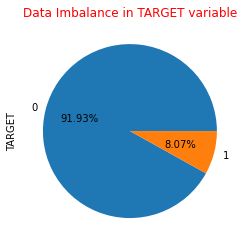

In [35]:
# In the Initial observation we found, there is a difference in TARGET column data, lets check out the target variable.
ad3.TARGET.value_counts().plot.pie(autopct='%1.2f%%')
plt.title("Data Imbalance in TARGET variable", fontdict={'fontsize': 12, 'fontweight' : 10, 'color' : 'red'});

In [36]:
# calculate the imbalance ratio. Groupby takes forever to calculate the ratio.
rat=ad3.TARGET.value_counts()
ratio=rat[0]/rat[1]
ratio.round()

11.0

### Data Split
###### The TARGET column definitely has high imbalance, inorder to identify and obsesrve defaulters behaviour we need to split the dataset into 2 sets and perform further analysis. 
##### The more we dig in, the interesting it gets. Now lets split the data based on TARGET column and try to plot some more better plots and understand, what other information is hidden?

In [37]:
ad0=ad3[ad3['TARGET']==0]
ad1=ad3[ad3['TARGET']==1]
ad0.head()
ad1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,Age
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,House / apartment,0.003541,Core staff,2.0,School,1.0,0.0,1.0,0.0,46
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,House / apartment,0.010032,Laborers,1.0,Government,0.0,0.0,0.0,0.0,52
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,House / apartment,0.008019,Laborers,2.0,Business Entity Type 3,2.0,0.0,2.0,0.0,52
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,House / apartment,0.028663,Core staff,1.0,Religion,0.0,0.0,0.0,0.0,55
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,House / apartment,0.035792,Laborers,2.0,Other,0.0,0.0,0.0,0.0,46


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,Age
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,House / apartment,0.018801,Laborers,1.0,Business Entity Type 3,2.0,2.0,2.0,2.0,26
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,House / apartment,0.018029,Cooking staff,1.0,Business Entity Type 3,10.0,1.0,10.0,0.0,51
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,House / apartment,0.025164,Laborers,2.0,Business Entity Type 3,0.0,0.0,0.0,0.0,48
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,House / apartment,0.007305,Sales staff,2.0,Self-employed,1.0,0.0,1.0,0.0,37
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,House / apartment,0.028663,unknown,2.0,XNA,1.0,1.0,1.0,1.0,68


## Segmented Univariate Analysis
###### Plot between the two dataframes of TARGET variable

In [38]:
objects=ad3.columns[ad3.dtypes=='object'].tolist()
objects

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE']

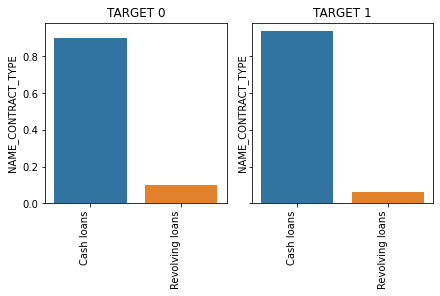

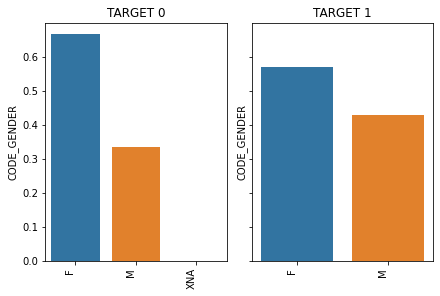

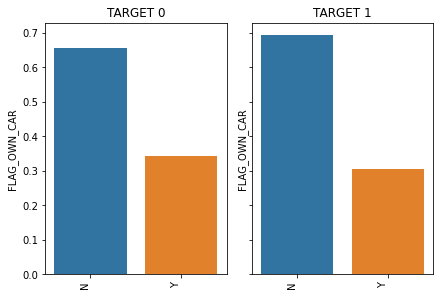

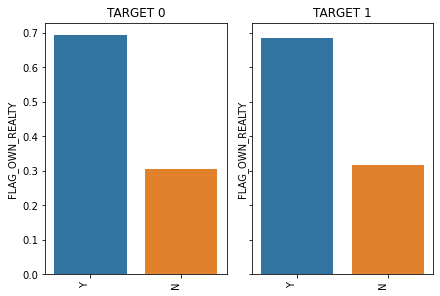

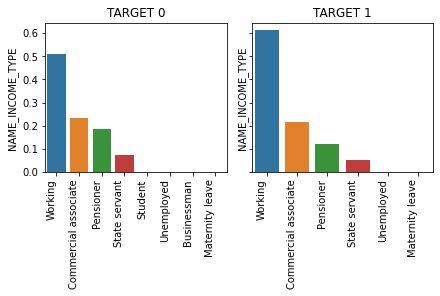

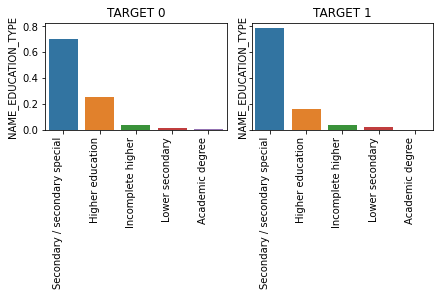

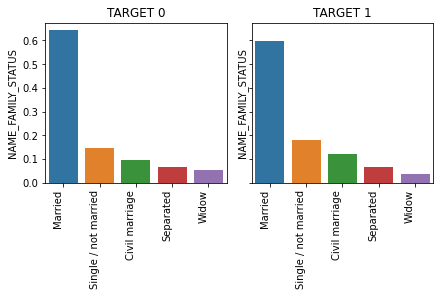

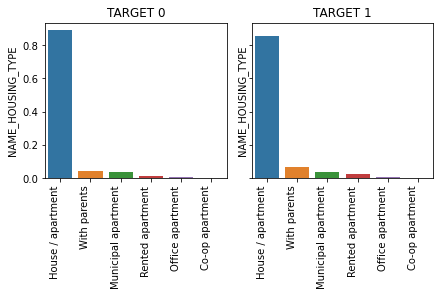

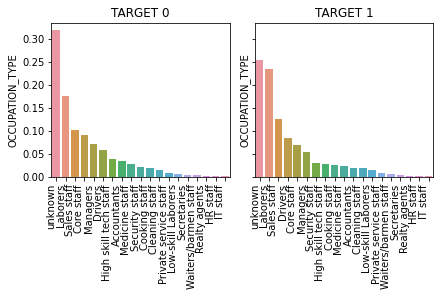

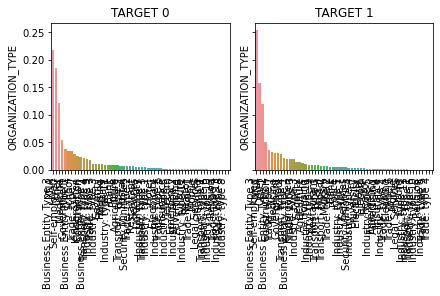

In [39]:
x=ad3.select_dtypes(include='object')
for i in x:
    var0=ad0[i].value_counts(normalize=True)
    fig, (a1,a2) = plt.subplots(1,2, sharey=True,constrained_layout=True)
    target0=sns.barplot(x=var0.index, y=var0, ax=a1)
    target0.set_title('TARGET 0')
    target0.set_xticklabels(target0.get_xticklabels(),rotation=90,horizontalalignment='right')
    
    var1=ad1[i].value_counts(normalize=True)
    target1=sns.barplot(x=var1.index, y=var1, ax=a2)
    target1.set_title('TARGET 1')
    target1.set_xticklabels(target1.get_xticklabels(),rotation=90,horizontalalignment='right')
plt.show();

###### From the above plots our observation about type of applicants didnt change in either target case. 
To summarize key observations from the plots, cash loans, females, no car, own realty, working class, Secondary education, married people, underpaid employees are highest amongst the loan seekers, which is a natural phenomenon. These are type of applicants and cash loans that are of high demand in working class women to be precise.

    1.45% men have difficulty repaying compared to men who doesnt have difficulty.
    2.Working class are the highest borrowers and they do seem to have difficulty repaying.
    3.Sales staff and Laborers seem to have greater difficulty.

In [40]:
floats=ad3.columns[ad3.dtypes=='float'].tolist()
floats
ints=ad3.columns[ad3.dtypes=='int64'].tolist()
ints

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'CNT_FAM_MEMBERS',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE']

['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'Age']

###### We plotted all the character data types together. Plotted income and occupation seperately. We also saw age distribution.
Lets figure out what other combinations we can look at.
In numerics, lets combine the continuous variables and plot them together and see how they would look. 
What are all the continuous varibles we have in the dataset Age, children count, Income, 4 variables from social circle. Lets plot social variables seperately and all others together as we found some outliers in the data. 

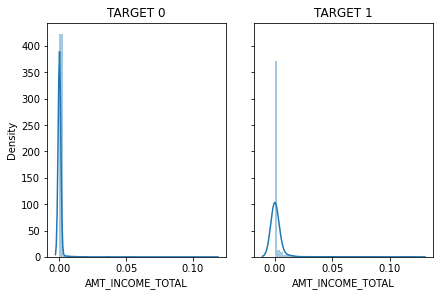

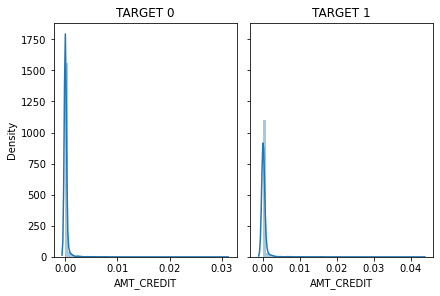

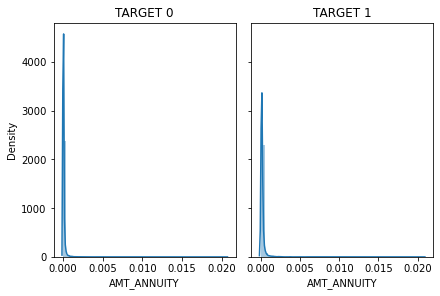

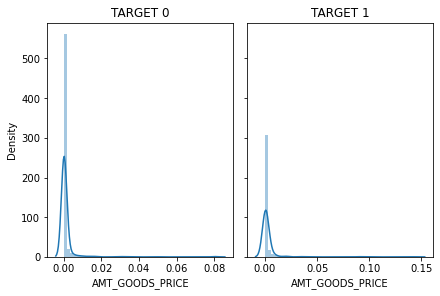

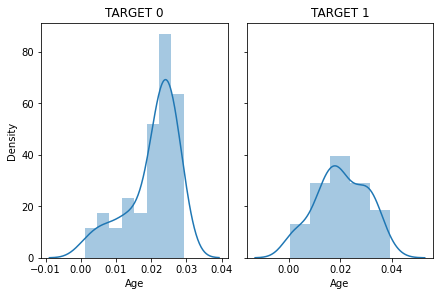

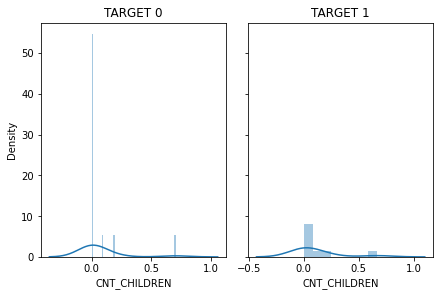

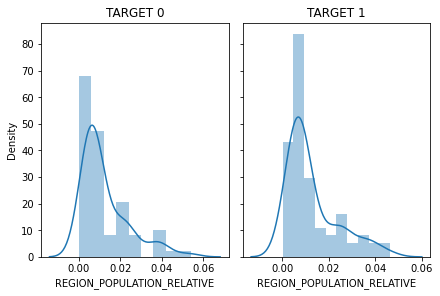

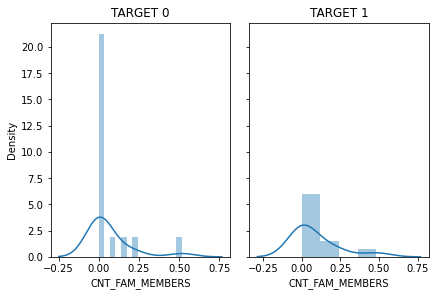

In [41]:
floats1=['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'Age','CNT_CHILDREN','REGION_POPULATION_RELATIVE', 'CNT_FAM_MEMBERS']
for i in floats1:
    var0=ad0[i].value_counts(normalize=True)
    fig, (a1,a2) = plt.subplots(1,2, sharey=True,constrained_layout=True)
    sns.distplot(var0,ax=a1).set(title='TARGET 0')
    var1=ad1[i].value_counts(normalize=True)
    sns.distplot(var1,ax=a2).set(title='TARGET 1')
plt.show();

#one can remove histograms from the plot, I like to keep them for range of values.

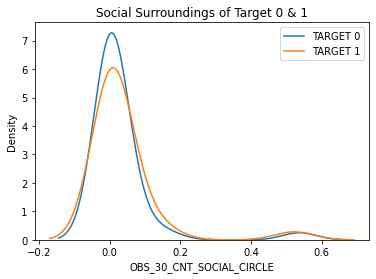

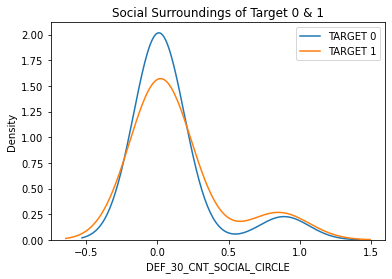

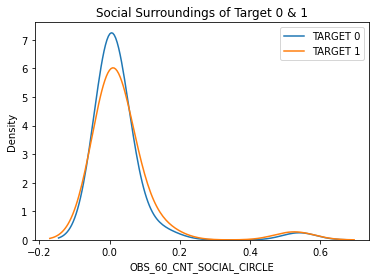

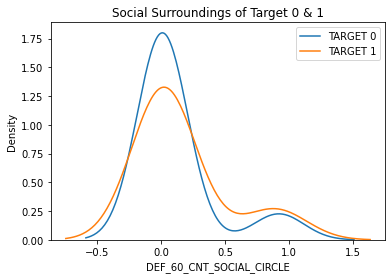

In [42]:
# Social surroundings had some outliers 
floats2=['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']
for i in floats2:
    var0=ad0[i].value_counts(normalize=True)
    fig = plt.subplots(1)
    sns.distplot(var0,hist=False,label='TARGET 0')
    var1=ad1[i].value_counts(normalize=True)
    sns.distplot(var1,hist=False,label='TARGET 1').set(title='Social Surroundings of Target 0 & 1')
    plt.legend()
plt.show();

# Bivariate Analysis
So far we plotted seperate graphs for variety of segments to draw some insights. Now lets try some combinations and
see what they speak. Thinking of combinations is a bit confusing, as to what variables we plot and test together.

In [43]:
ad3.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,Age
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,House / apartment,0.018801,Laborers,1.0,Business Entity Type 3,2.0,2.0,2.0,2.0,26
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,House / apartment,0.003541,Core staff,2.0,School,1.0,0.0,1.0,0.0,46
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,House / apartment,0.010032,Laborers,1.0,Government,0.0,0.0,0.0,0.0,52
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,House / apartment,0.008019,Laborers,2.0,Business Entity Type 3,2.0,0.0,2.0,0.0,52
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,House / apartment,0.028663,Core staff,1.0,Religion,0.0,0.0,0.0,0.0,55


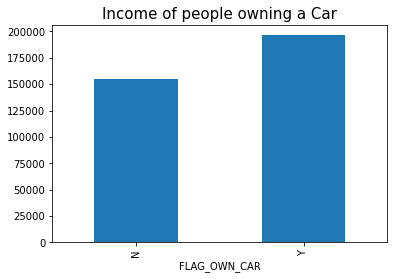

In [44]:
ad3.groupby("FLAG_OWN_CAR")['AMT_INCOME_TOTAL'].mean().plot.bar()
plt.title('Income of people owning a Car',fontsize=15)
plt.show();

FLAG_OWN_REALTY
N    167766.0
Y    169304.0
Name: AMT_INCOME_TOTAL, dtype: float64

<AxesSubplot:xlabel='FLAG_OWN_REALTY'>

Text(0.5, 1.0, 'Income of people with own House')

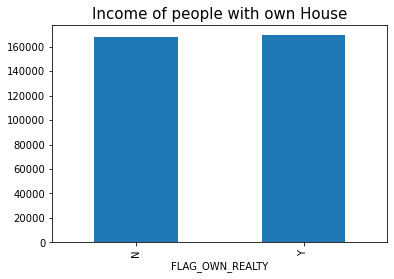

In [45]:
ad3.groupby("FLAG_OWN_REALTY")['AMT_INCOME_TOTAL'].mean().round()
ad3.groupby("FLAG_OWN_REALTY")['AMT_INCOME_TOTAL'].mean().plot.bar()
plt.title('Income of people with own House',fontsize=15)
plt.show()

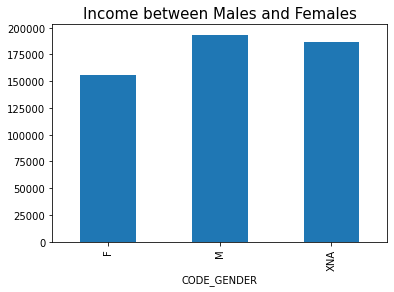

In [46]:
ad3.groupby("CODE_GENDER")['AMT_INCOME_TOTAL'].mean().plot.bar()
plt.title('Income between Males and Females',fontsize=15)
plt.show();

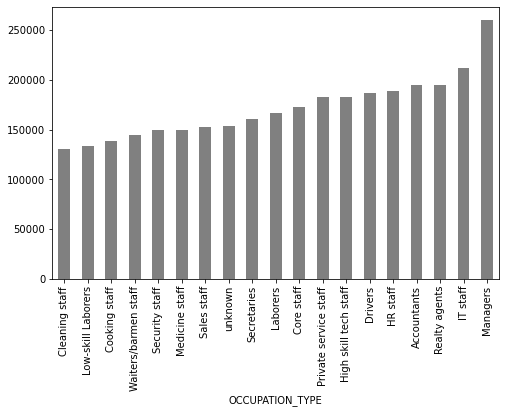

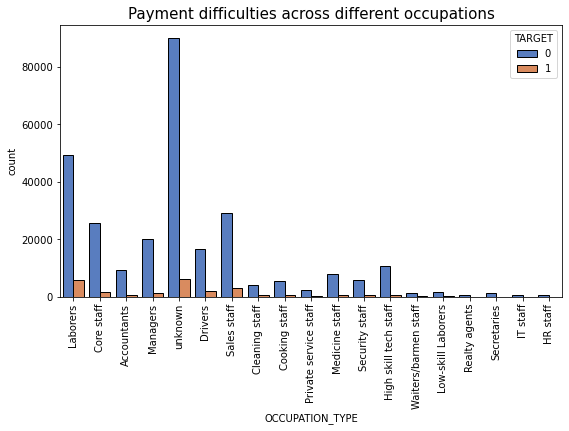

In [47]:
plt.figure(figsize = [8,5]);
# plt.ylim(2,100000)
ad3.groupby("OCCUPATION_TYPE")['AMT_INCOME_TOTAL'].mean().sort_values().plot.bar(color='grey')
plt.figure(figsize = [9,5]);

sns.countplot("OCCUPATION_TYPE", hue='TARGET', data=ad3,palette='muted',edgecolor='black')
plt.title('Payment difficulties across different occupations',fontsize=15)
plt.xticks(rotation=90);

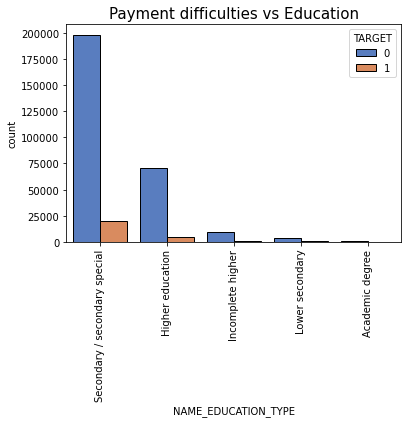

In [48]:
sns.countplot("NAME_EDUCATION_TYPE", hue='TARGET', data=ad3,palette='muted',edgecolor='black')
plt.title('Payment difficulties vs Education',fontsize=15)
plt.xticks(rotation=90);

###### Observations from Plotting Different Combinations 
    1.People with car has high salary
    2.Income of own reality and rented has same income levels
    3.Males earn higher than females, however from previous analysis we found Males has higher repayment 
      difficulties compared to Females.
    4.Education has great impact on repayment

## Top 10 Correlations Application Dataset
###### Q. Find the top 10 correlation for the Client with payment difficulties and all other cases (Target variable). Note that you have to find the top correlation by segmenting the data frame w.r.t to the target variable and then find the top correlation for each of the segmented data and find if any insight is there.  Say, there are 5+1(target) variables in a dataset: Var1, Var2, Var3, Var4, Var5, Target. And if you have to find top 3 correlation, it can be: Var1 & Var2, Var2 & Var3, Var1 & Var3. Target variable will not feature in this correlation as it is a categorical variable and not a continuous variable which is increasing or decreasing. 

In [49]:
#Question do we do it on ad3 all together or ad0 and ad1 seperately
ad3.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,Age
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,House / apartment,0.018801,Laborers,1.0,Business Entity Type 3,2.0,2.0,2.0,2.0,26
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,House / apartment,0.003541,Core staff,2.0,School,1.0,0.0,1.0,0.0,46
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,House / apartment,0.010032,Laborers,1.0,Government,0.0,0.0,0.0,0.0,52
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,House / apartment,0.008019,Laborers,2.0,Business Entity Type 3,2.0,0.0,2.0,0.0,52
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,House / apartment,0.028663,Core staff,1.0,Religion,0.0,0.0,0.0,0.0,55


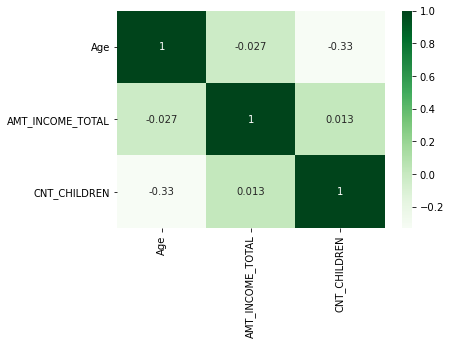

In [50]:
sns.heatmap(ad3[['Age','AMT_INCOME_TOTAL','CNT_CHILDREN']].corr(),annot=True,cmap='Greens');

In [51]:
ad3.corr(method='pearson').abs()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,Age
SK_ID_CURR,1.000000,0.002078,0.001209,0.001782,0.000243,0.000286,0.000253,0.000914,0.002950,0.001393,0.000093,0.001409,0.001198,0.001520
TARGET,0.002078,1.000000,0.019217,0.003963,0.030390,0.012819,0.039647,0.037207,0.009306,0.009390,0.032333,0.009297,0.031334,0.078407
CNT_CHILDREN,0.001209,0.019217,1.000000,0.012933,0.002312,0.021604,0.001829,0.025478,0.879159,0.015668,0.001184,0.015308,0.001758,0.330930
AMT_INCOME_TOTAL,0.001782,0.003963,0.012933,1.000000,0.156725,0.191512,0.159607,0.074736,0.016371,0.013506,0.013422,0.013423,0.013286,0.027282
AMT_CREDIT,0.000243,0.030390,0.002312,0.156725,1.000000,0.769940,0.986968,0.099608,0.063283,0.000870,0.020788,0.000913,0.023362,0.055156
AMT_ANNUITY,0.000286,0.012819,0.021604,0.191512,0.769940,1.000000,0.775109,0.118306,0.075709,0.011389,0.022410,0.011139,0.023604,0.009842
AMT_GOODS_PRICE,0.000253,0.039647,0.001829,0.159607,0.986968,0.775109,1.000000,0.103506,0.061180,0.000773,0.021963,0.000791,0.024256,0.053473
REGION_POPULATION_RELATIVE,0.000914,0.037207,0.025478,0.074736,0.099608,0.118306,0.103506,1.000000,0.024165,0.012077,0.005813,0.011554,0.001997,0.029507
CNT_FAM_MEMBERS,0.002950,0.009306,0.879159,0.016371,0.063283,0.075709,0.061180,0.024165,1.000000,0.025485,0.002494,0.025141,0.004562,0.278911
OBS_30_CNT_SOCIAL_CIRCLE,0.001393,0.009390,0.015668,0.013506,0.000870,0.011389,0.000773,0.012077,0.025485,1.000000,0.329780,0.998493,0.253913,0.007193


In [52]:
#Lets change a few character data to numeric to find better correlations
# Gender, carflag, realtyflag, 

In [53]:
ad3['gendr_num']=ad3['CODE_GENDER'].apply(lambda x: x.replace('F','0').replace('M','1')).replace('XNA','2').astype('int')

In [54]:
#ad3['FLAG_OWN_CAR'].apply(lambda X: x.replace('Y','0').replace('N','1')).astype('int')
#This method shows memory error for FLAG_OWN_CAR
ad3['car_num']=np.where(ad3.FLAG_OWN_CAR=="Y",1,0)

In [55]:
ad3['realty_num']=ad3['car_num']=np.where(ad3.FLAG_OWN_REALTY=="Y",1,0)

In [56]:
ad3.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,Age,gendr_num,car_num,realty_num
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,1.0,Business Entity Type 3,2.0,2.0,2.0,2.0,26,1,1,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,2.0,School,1.0,0.0,1.0,0.0,46,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,1.0,Government,0.0,0.0,0.0,0.0,52,1,1,1
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,Business Entity Type 3,2.0,0.0,2.0,0.0,52,0,1,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,1.0,Religion,0.0,0.0,0.0,0.0,55,1,1,1


In [57]:
correla=ad3.corr(method='pearson').abs()
correla1 = correla.unstack()
tops = correla1.sort_values(kind="quicksort")

In [58]:
#Correlation values
tops.to_frame().reset_index()
top=pd.DataFrame(tops)
top['corr1']=top.index.get_level_values(0)
top['corr2']=top.index.get_level_values(1)
tp=top.reset_index(drop=True)
tp.rename(columns={tp.columns[0]:'corr_val'},inplace=True);

In [59]:
cor=tp[tp['corr_val'] <1]
cor_fin=cor.sort_values(by=['corr_val'],ascending=False)
cor_fin.drop_duplicates(subset='corr_val',keep='last',inplace=True)
cor_fin.head(10)

,corr_val,corr1,corr2
268,0.998493,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE
266,0.986968,AMT_CREDIT,AMT_GOODS_PRICE
264,0.879159,CNT_FAM_MEMBERS,CNT_CHILDREN
262,0.860519,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
260,0.775109,AMT_ANNUITY,AMT_GOODS_PRICE
258,0.769940,AMT_CREDIT,AMT_ANNUITY
256,0.332011,OBS_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE
254,0.330930,CNT_CHILDREN,Age
253,0.329780,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE
250,0.278911,Age,CNT_FAM_MEMBERS


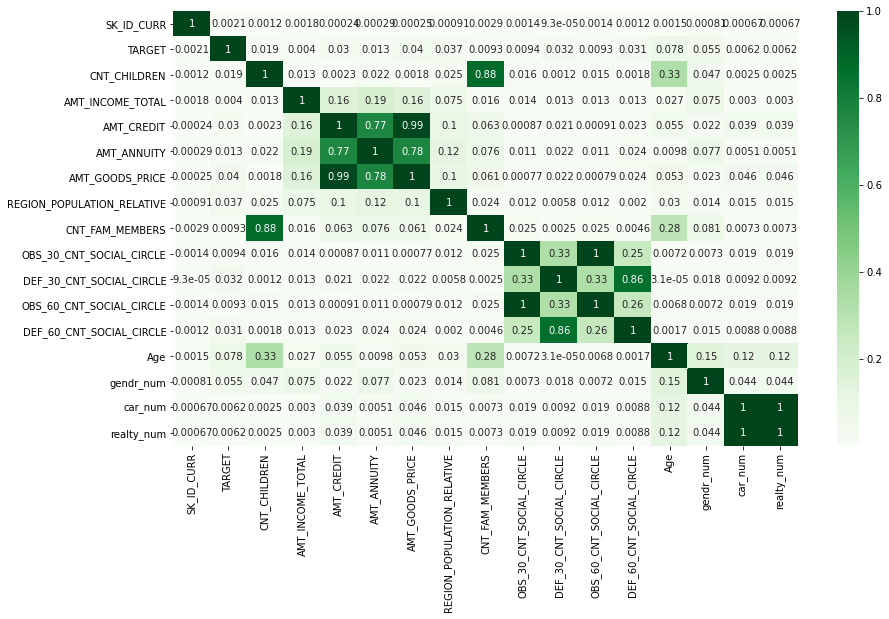

In [60]:
plt.figure(figsize=(14,8))
sns.heatmap(correla,cmap='Greens',annot=True)
plt.show();

# Previous Application
With the experience from application dataset. Lets perform a similar analysis on previous application dataset. 

In [61]:
pa.info()
a=pa.isnull().sum()/pa.shape[0]*100
a[a>1].round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

AMT_ANNUITY                  22.29
AMT_DOWN_PAYMENT             53.64
AMT_GOODS_PRICE              23.08
RATE_DOWN_PAYMENT            53.64
RATE_INTEREST_PRIMARY        99.64
RATE_INTEREST_PRIVILEGED     99.64
NAME_TYPE_SUITE              49.12
CNT_PAYMENT                  22.29
DAYS_FIRST_DRAWING           40.30
DAYS_FIRST_DUE               40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
DAYS_LAST_DUE                40.30
DAYS_TERMINATION             40.30
NFLAG_INSURED_ON_APPROVAL    40.30
dtype: float64

In [62]:
#There are columns with 99 percent missing, there is not point of keeping them.
pa1=pa.drop(['RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED','NAME_TYPE_SUITE','DAYS_FIRST_DRAWING','DAYS_LAST_DUE_1ST_VERSION','NFLAG_INSURED_ON_APPROVAL'],axis=1)
pa1.shape

(1670214, 31)

In [63]:
pa1.isnull().sum()/pa1.shape[0]*100
#dropping missing rows is not helping, lets drop some more columns 
pa3=pa1.drop(['AMT_DOWN_PAYMENT','RATE_DOWN_PAYMENT','DAYS_LAST_DUE','DAYS_TERMINATION','AMT_GOODS_PRICE','CNT_PAYMENT'],axis=1);
pa3.shape
pa3.isnull().sum()/pa3.shape[0]*100
# Now we have 25 columns without non missing records.

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDU

(1670214, 25)

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
NAME_YIELD_GROUP                0.000000
PRODUCT_COMBINATION             0.020716
DAYS_FIRST_DUE  

In [64]:
pd.set_option('display.max_columns', None)
pa3.head()
pa3.isna().sum()/pa3.shape[0]*100

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DUE
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,middle,POS mobile with interest,-42.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,low_action,Cash X-Sell: low,-134.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,high,Cash X-Sell: high,-271.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,middle,Cash X-Sell: middle,-482.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high,Cash Street: high,NaN


SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
NAME_YIELD_GROUP                0.000000
PRODUCT_COMBINATION             0.020716
DAYS_FIRST_DUE  

#### Observations 
    DAYS_FIRST_DUE,DAYS_DECISION : Has negative values

In [65]:
#Converted negative values to positive values.
# pa3['DAYS_FIRST_DUE_YRS']=pa3['DAYS_FIRST_DUE'].abs()/365
# pa3.DAYS_FIRST_DUE_YRS.head(10)
pa3['DAYS_DECISION_YRS']=pa3['DAYS_DECISION'].abs()/365
pa3.DAYS_DECISION_YRS.head(10)
# pa3.DAYS_FIRST_DUE_YRS=pa3.DAYS_FIRST_DUE_YRS.round().astype("int64")
pa3.DAYS_DECISION_YRS=pa3.DAYS_DECISION_YRS.round().astype("int64")
pa3.DAYS_DECISION_YRS.head(10)

0    0.200000
1    0.449315
2    0.824658
3    1.402740
4    2.139726
5    1.873973
6    0.038356
7    0.057534
8    1.057534
9    0.156164
Name: DAYS_DECISION_YRS, dtype: float64

0    0
1    0
2    1
3    1
4    2
5    2
6    0
7    0
8    1
9    0
Name: DAYS_DECISION_YRS, dtype: int64

In [66]:
pa3.shape
pa4=pa3.drop(['DAYS_FIRST_DUE','DAYS_DECISION'],axis=1)
pa4.shape

(1670214, 26)

(1670214, 24)

### Lets find if there are any outliers

In [67]:
floats=pa4.columns[pa4.dtypes=='float'].tolist()
floats
ints=pa4.columns[pa4.dtypes=='int64'].tolist()
del ints[0:2]
ints

['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT']

['HOUR_APPR_PROCESS_START',
 'NFLAG_LAST_APPL_IN_DAY',
 'SELLERPLACE_AREA',
 'DAYS_DECISION_YRS']

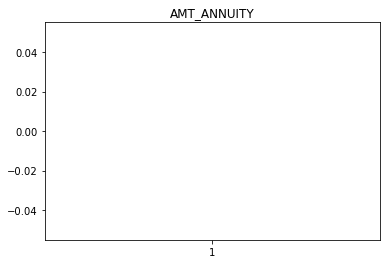

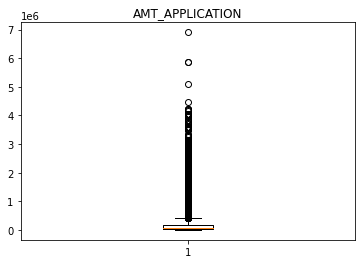

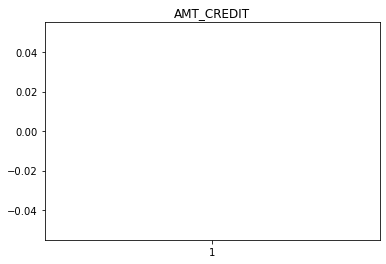

In [68]:
for i in floats:
#     plt.figure(figsize=[6,2])
    ax=plt.subplots(1,1)
    plt.boxplot(pa4[i])
    plt.title(i)
plt.show();

<Figure size 432x144 with 0 Axes>

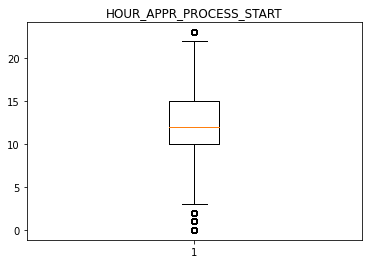

<Figure size 432x144 with 0 Axes>

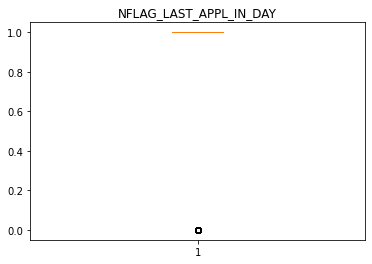

<Figure size 432x144 with 0 Axes>

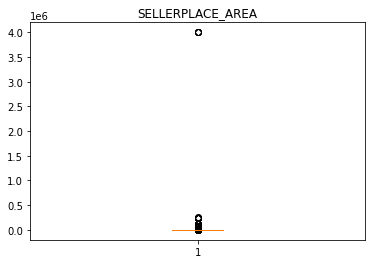

<Figure size 432x144 with 0 Axes>

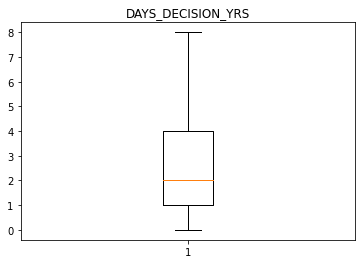

In [69]:
for i in ints:
    plt.figure(figsize=[6,2])
    ax=plt.subplots(1,1)
    plt.boxplot(pa4[i])
    plt.title(i)
plt.show();

## Observations 
    #AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT are all coninuous values, no outliers.

In [70]:
pa3.DAYS_FIRST_DUE.value_counts()
pa3[pa3.DAYS_FIRST_DUE==365243.0 ]

 365243.0    40645
-334.0         772
-509.0         760
-208.0         751
-330.0         750
             ...  
-2889.0         86
-2890.0         73
-2891.0         55
-2.0            14
-2892.0          9
Name: DAYS_FIRST_DUE, Length: 2892, dtype: int64

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DUE,DAYS_DECISION_YRS
49,1371540,200721,Revolving loans,11250.000,225000.0,225000.0,FRIDAY,15,Y,1,XAP,Approved,-847,XNA,XAP,Repeater,XNA,Cards,walk-in,Credit and cash offices,-1,XNA,XNA,Card Street,365243.0,2
138,1897668,205582,Revolving loans,2250.000,45000.0,45000.0,MONDAY,16,Y,1,XAP,Approved,-234,XNA,XAP,New,XNA,Cards,walk-in,Country-wide,3000,Consumer electronics,XNA,Card Street,365243.0,1
143,1975174,276237,Revolving loans,22500.000,0.0,450000.0,TUESDAY,13,Y,1,XAP,Approved,-510,XNA,XAP,Repeater,XNA,Cards,x-sell,Country-wide,1500,Consumer electronics,XNA,Card X-Sell,365243.0,1
150,1642964,248217,Consumer loans,18553.725,180000.0,194031.0,WEDNESDAY,12,Y,1,XAP,Approved,-16,Cash through the bank,XAP,Repeater,Clothing and Accessories,POS,XNA,Stone,70,Clothing,low_normal,POS industry with interest,365243.0,0
159,1723023,337203,Revolving loans,2250.000,45000.0,45000.0,WEDNESDAY,10,Y,1,XAP,Approved,-160,XNA,XAP,Repeater,XNA,Cards,walk-in,Regional / Local,145,Consumer electronics,XNA,Card Street,365243.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669538,2572617,433117,Revolving loans,19125.000,382500.0,382500.0,THURSDAY,11,Y,1,XAP,Approved,-203,XNA,XAP,Repeater,XNA,Cards,x-sell,Credit and cash offices,-1,XNA,XNA,Card X-Sell,365243.0,1
1669624,2461763,308500,Revolving loans,0.000,0.0,0.0,SUNDAY,4,Y,1,XAP,Approved,-1536,XNA,XAP,Repeater,XNA,Cards,x-sell,Country-wide,40,Connectivity,XNA,Card Street,365243.0,4
1669730,2334397,440945,Revolving loans,11250.000,0.0,225000.0,FRIDAY,11,Y,1,XAP,Approved,-589,XNA,XAP,Refreshed,XNA,Cards,x-sell,Credit and cash offices,0,XNA,XNA,Card X-Sell,365243.0,2
1669796,1161466,134972,Revolving loans,4500.000,90000.0,90000.0,TUESDAY,12,Y,1,XAP,Approved,-408,XNA,XAP,Repeater,XNA,Cards,x-sell,Credit and cash offices,-1,XNA,XNA,Card X-Sell,365243.0,1


###### Column DAYS_FIRST_DUE has outliers, these are definitely invalid values. If we convert 365243 into years this will be some 1000 years. This some data capturing error. One way to handle them is to exclude from the analysis.

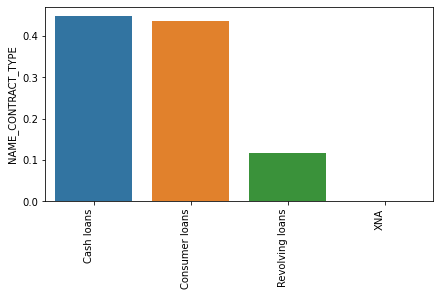

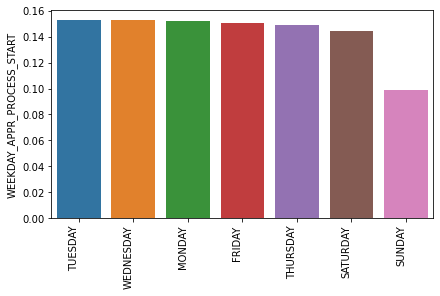

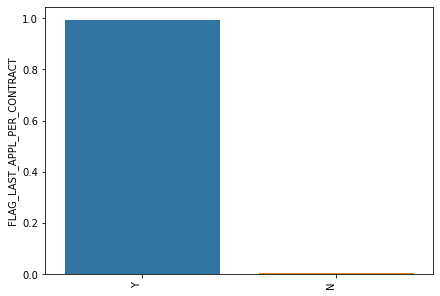

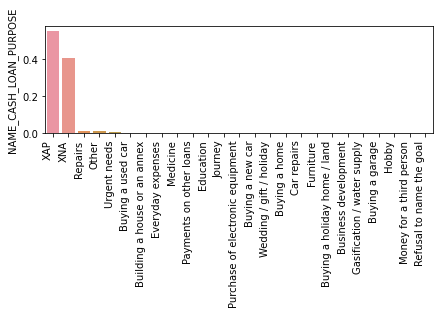

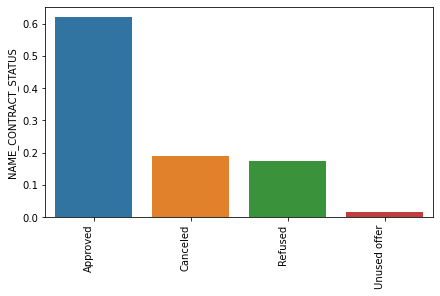

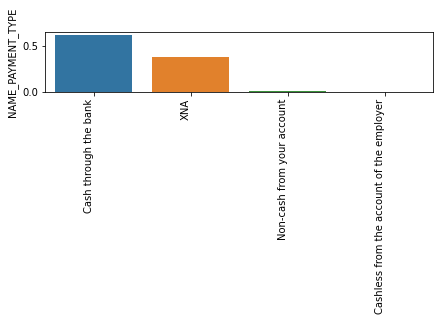

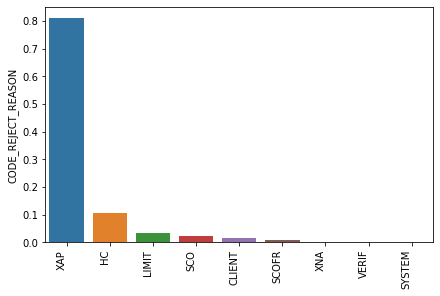

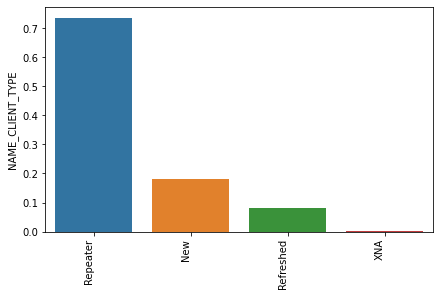

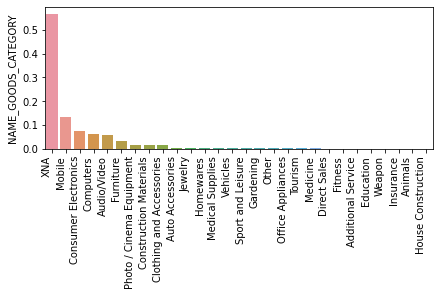

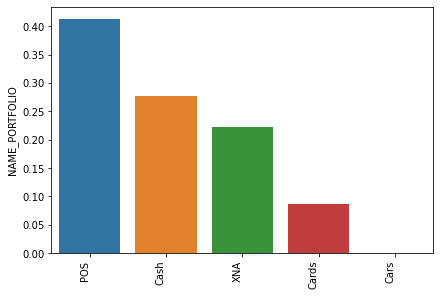

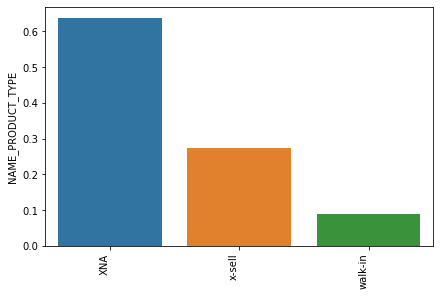

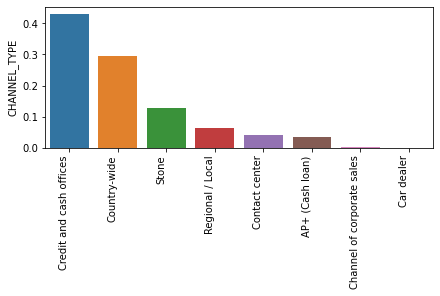

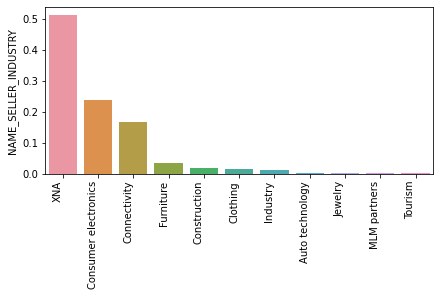

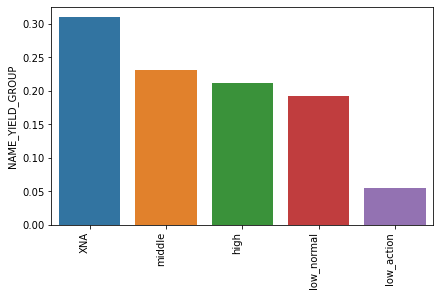

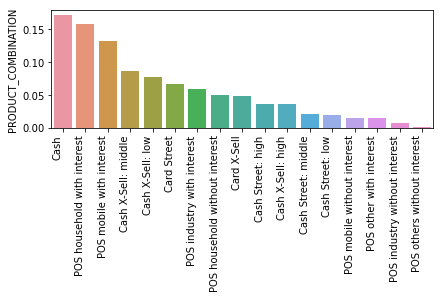

In [71]:
x=pa4.select_dtypes(include='object')
for i in x:
    var0=pa4[i].value_counts(normalize=True)
    fig = plt.subplots(1, sharey=True,constrained_layout=True)
    target0=sns.barplot(x=var0.index, y=var0)
    target0.set_xticklabels(target0.get_xticklabels(),rotation=90,horizontalalignment='right')
    
#     var1=ad1[i].value_counts(normalize=True)
#     target1=sns.barplot(x=var1.index, y=var1, ax=a2)
#     target1.set_title('TARGET 1')
#     target1.set_xticklabels(target1.get_xticklabels(),rotation=90,horizontalalignment='right')
plt.show();

In [72]:
pa.NAME_CONTRACT_STATUS.value_counts()
pa1.NAME_CONTRACT_STATUS.value_counts()
#pa2.NAME_CONTRACT_STATUS.value_counts()
pa3.NAME_CONTRACT_STATUS.value_counts()
pa4.NAME_CONTRACT_STATUS.value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

#Approved    648964
#Name: NAME_CONTRACT_STATUS, dtype: int64
###### This is an important finding in my own work by plotting all columns together. I dropped missing rows from pa1 dataframe to pa2. This made 
###### NAME_CONTRACT_STATUS to only have Approved records in it. So I have reversed the change and dropped only the columns. 

### Observations From Plots
    1. Previous applications have consumer loans,along with cash loans and revolving loans.
    2. Looks like almost all applicants refused mention purpose of loan.
    3. Approval rate is at 60-40.
    4. DAYS_FIRST_DUE has outliers.

### TOP 10 Correlations Previous Application

In [73]:
correla=pa4.corr(method='pearson').abs()
correla1 = correla.unstack()
tops = correla1.sort_values(kind="quicksort")

In [74]:
#Correlation values
tops.to_frame().reset_index()
top=pd.DataFrame(tops)
top['corr1']=top.index.get_level_values(0)
top['corr2']=top.index.get_level_values(1)
tp=top.reset_index(drop=True)
tp.rename(columns={tp.columns[0]:'corr_val'},inplace=True);

In [75]:
cor=tp[tp['corr_val'] <1]
cor_fin=cor.sort_values(by=['corr_val'],ascending=False)
cor_fin.drop_duplicates(subset='corr_val',keep='last',inplace=True)
cor_fin.head(10)

,corr_val,corr1,corr2
70,0.975824,AMT_APPLICATION,AMT_CREDIT
68,0.816429,AMT_ANNUITY,AMT_CREDIT
66,0.808872,AMT_APPLICATION,AMT_ANNUITY
64,0.276682,DAYS_DECISION_YRS,AMT_ANNUITY
62,0.132392,AMT_CREDIT,DAYS_DECISION_YRS
60,0.132232,DAYS_DECISION_YRS,AMT_APPLICATION
58,0.039137,HOUR_APPR_PROCESS_START,DAYS_DECISION_YRS
56,0.036201,HOUR_APPR_PROCESS_START,AMT_ANNUITY
55,0.025179,NFLAG_LAST_APPL_IN_DAY,AMT_CREDIT
53,0.021039,AMT_CREDIT,HOUR_APPR_PROCESS_START


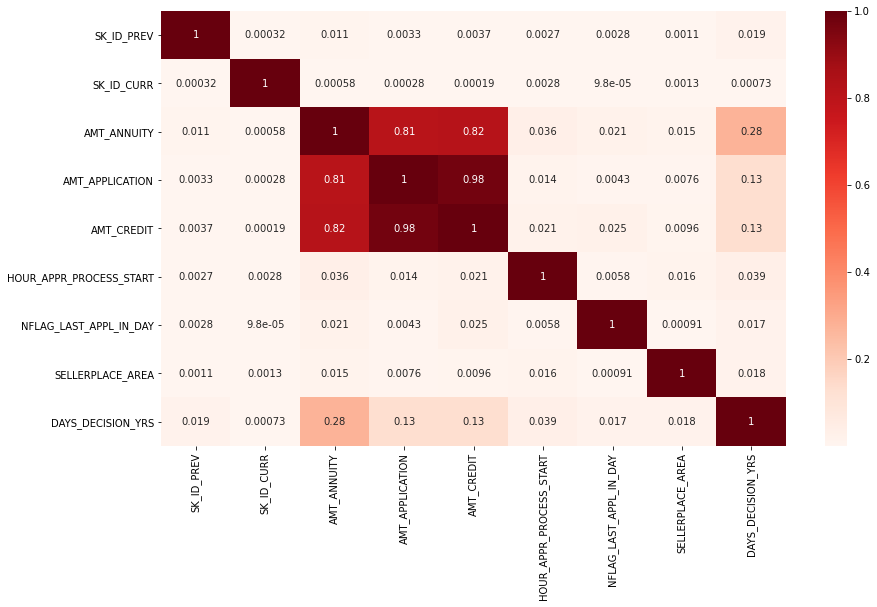

In [76]:
plt.figure(figsize=(14,8))
sns.heatmap(correla,cmap='Reds',annot=True)
plt.show();

## Merge application and previous application datasets. 
##### By merging we want to keep all the data from ad3 and take matching data from previous application data. The common variable here is SK_ID_CURR.  So lets name this as "ap" taking first letter from both dataset names.

In [77]:
ap=pd.merge(left=ad3,right=pa4, how='left', left_on='SK_ID_CURR', right_on='SK_ID_CURR')

In [78]:
ap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1428843 entries, 0 to 1428842
Data columns (total 50 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1428843 non-null  int64  
 1   TARGET                       1428843 non-null  int64  
 2   NAME_CONTRACT_TYPE_x         1428843 non-null  object 
 3   CODE_GENDER                  1428843 non-null  object 
 4   FLAG_OWN_CAR                 1428843 non-null  object 
 5   FLAG_OWN_REALTY              1428843 non-null  object 
 6   CNT_CHILDREN                 1428843 non-null  int64  
 7   AMT_INCOME_TOTAL             1428843 non-null  float64
 8   AMT_CREDIT_x                 1428843 non-null  float64
 9   AMT_ANNUITY_x                1428843 non-null  float64
 10  AMT_GOODS_PRICE              1428843 non-null  float64
 11  NAME_INCOME_TYPE             1428843 non-null  object 
 12  NAME_EDUCATION_TYPE          1428843 non-n

In [79]:
ap.isnull().sum()/ap.shape[0]*100.0

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE_x            0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT_x                    0.000000
AMT_ANNUITY_x                   0.000000
AMT_GOODS_PRICE                 0.000000
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
OCCUPATION_TYPE                 0.000000
CNT_FAM_MEMBERS                 0.000000
ORGANIZATION_TYPE               0.000000
OBS_30_CNT_SOCIAL_CIRCLE        0.000000
DEF_30_CNT_SOCIAL_CIRCLE        0.000000
OBS_60_CNT_SOCIAL_CIRCLE        0.000000
DEF_60_CNT_SOCIAL_CIRCLE        0.000000
Age                             0.000000
gendr_num       

In [80]:
ap.SK_ID_PREV.isnull().describe()

count     1428843
unique          2
top         False
freq      1412400
Name: SK_ID_PREV, dtype: object

In [81]:
ap.CODE_REJECT_REASON.value_counts()
ap.NAME_CONTRACT_STATUS.value_counts()

XAP       1144591
HC         145757
LIMIT       47721
SCO         32603
CLIENT      22747
SCOFR       10866
XNA          4371
VERIF        3075
SYSTEM        669
Name: CODE_REJECT_REASON, dtype: int64

Approved        885313
Canceled        259285
Refused         245055
Unused offer     22747
Name: NAME_CONTRACT_STATUS, dtype: int64

## Plot between datasets

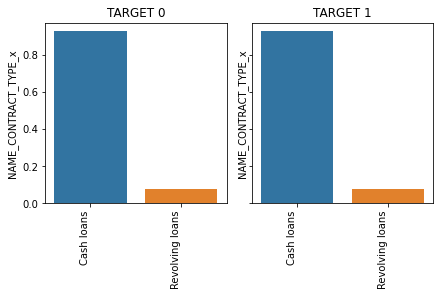

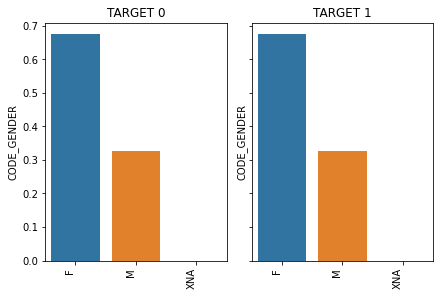

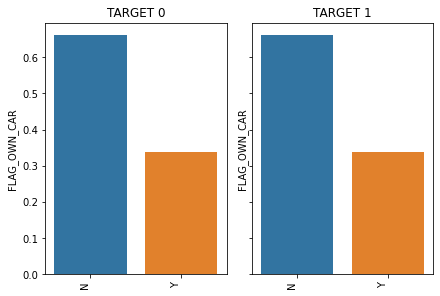

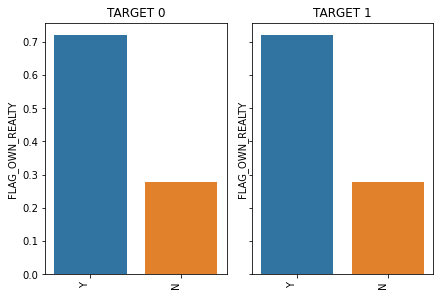

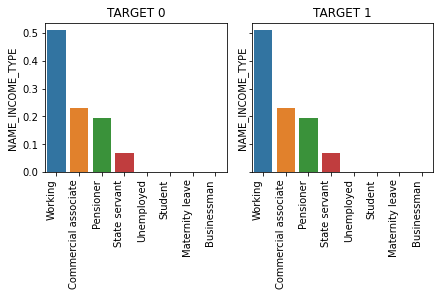

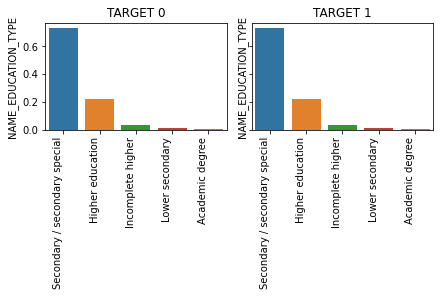

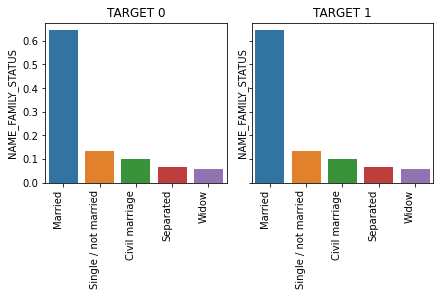

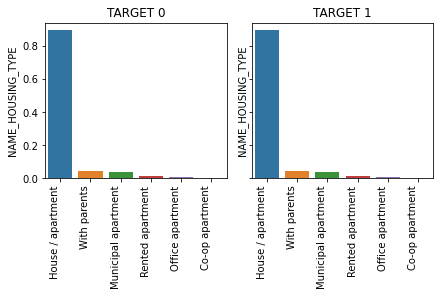

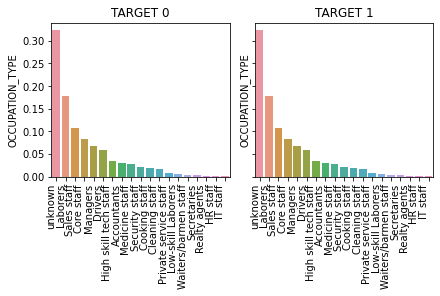

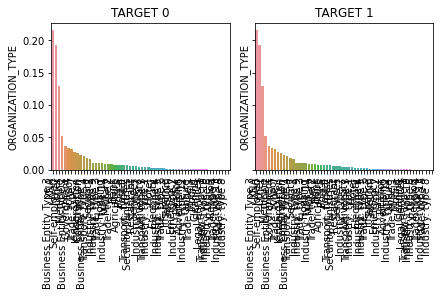

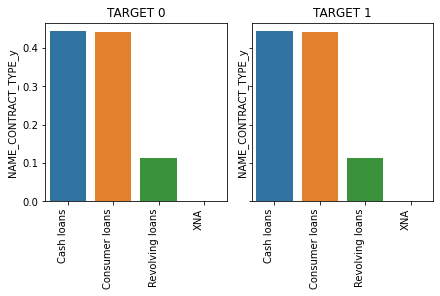

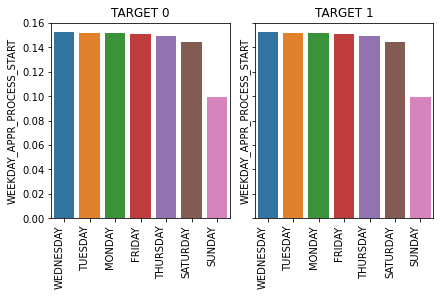

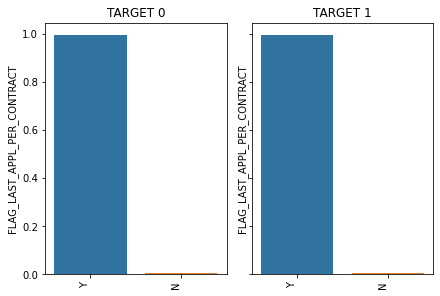

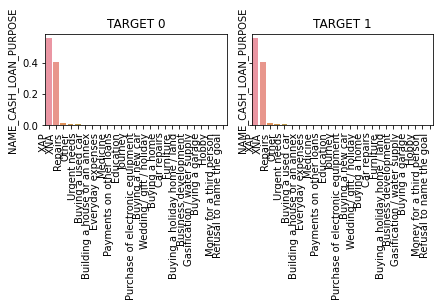

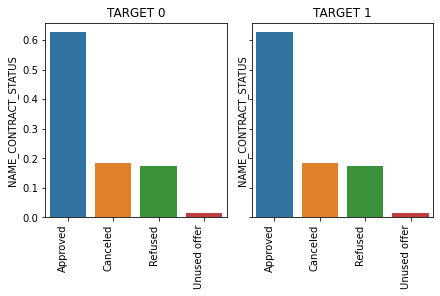

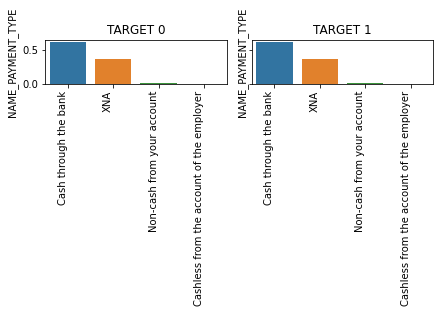

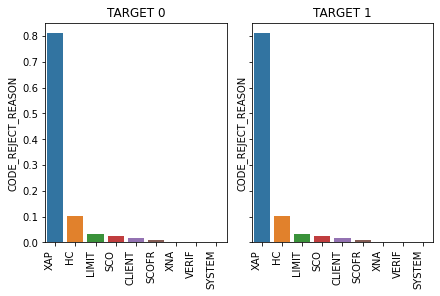

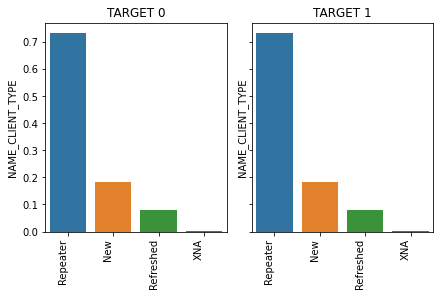

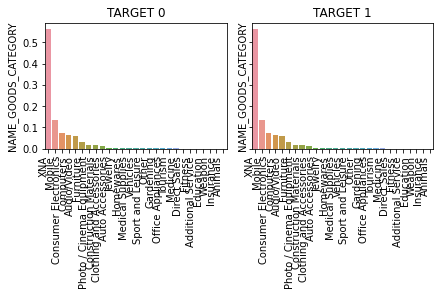

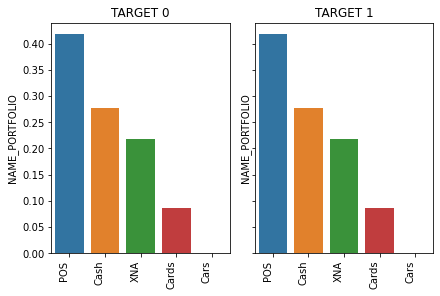

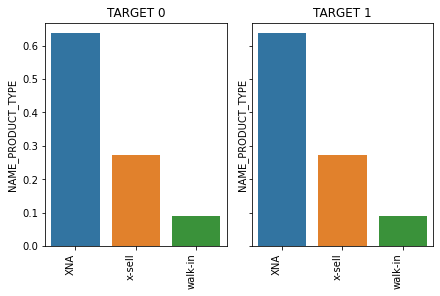

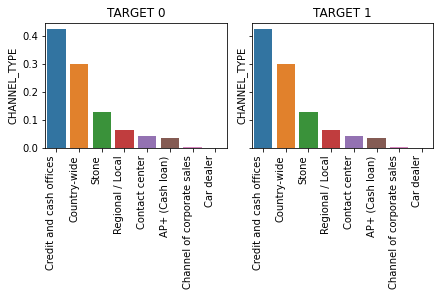

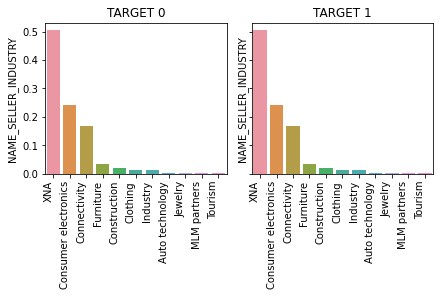

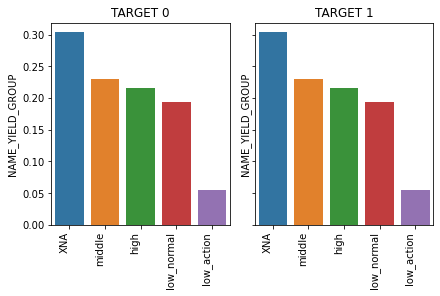

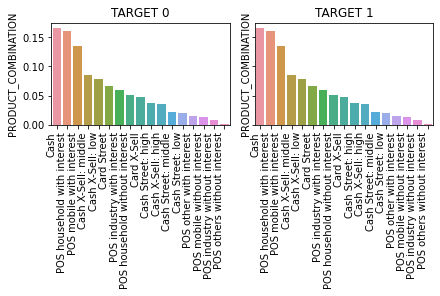

In [82]:
x=ap.select_dtypes(include='object')
var0=ap[ap['TARGET']==0]
var1=ap[ap['TARGET']==1]
for i in x:
    var0=ap[i].value_counts(normalize=True)
    fig, (a1,a2) = plt.subplots(1,2, sharey=True,constrained_layout=True)
    target0=sns.barplot(x=var0.index, y=var0, ax=a1)
    target0.set_title('TARGET 0')
    target0.set_xticklabels(target0.get_xticklabels(),rotation=90,horizontalalignment='right')
    
    var1=ap[i].value_counts(normalize=True)
    target1=sns.barplot(x=var1.index, y=var1, ax=a2)
    target1.set_title('TARGET 1')
    target1.set_xticklabels(target1.get_xticklabels(),rotation=90,horizontalalignment='right')
plt.show();

## TOP 10 Correlations Merged Dataset

In [83]:
correla=ap.corr(method='pearson').abs()
correla1 = correla.unstack()
tops = correla1.sort_values(kind="quicksort")

In [84]:
#Correlation values
tops.to_frame().reset_index()
top=pd.DataFrame(tops)
top['corr1']=top.index.get_level_values(0)
top['corr2']=top.index.get_level_values(1)
tp=top.reset_index(drop=True)
tp.rename(columns={tp.columns[0]:'corr_val'},inplace=True);

In [85]:
cor=tp[tp['corr_val'] <1]
cor_fin=cor.sort_values(by=['corr_val'],ascending=False)
cor_fin.drop_duplicates(subset='corr_val',keep='last',inplace=True)
cor_fin.head(10)

,corr_val,corr1,corr2
596,0.998560,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE
594,0.986401,AMT_GOODS_PRICE,AMT_CREDIT_x
592,0.975752,AMT_CREDIT_y,AMT_APPLICATION
590,0.878923,CNT_CHILDREN,CNT_FAM_MEMBERS
588,0.862553,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
586,0.817995,AMT_CREDIT_y,AMT_ANNUITY_y
584,0.810036,AMT_ANNUITY_y,AMT_APPLICATION
582,0.763417,AMT_GOODS_PRICE,AMT_ANNUITY_x
581,0.759081,AMT_CREDIT_x,AMT_ANNUITY_x
579,0.361355,Age,CNT_CHILDREN


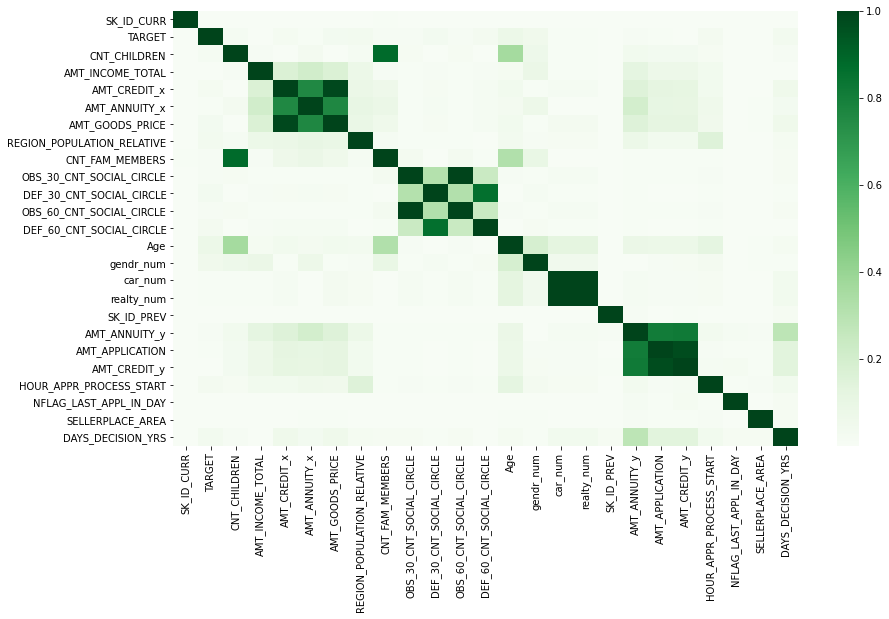

In [86]:
plt.figure(figsize=(14,8))
sns.heatmap(correla,cmap='Greens')
plt.show();

## Business Explanation 
Q. Explain the results of univariate, segmented univariate, bivariate analysis, etc. in business terms.

    45% Males has repayment difficulty.  
    90% Need Cash loans. 
    60% Working class has repayment difficulty
    60% Married people has repayment difficulty.  
    Sales staff and Laborers seem to have greater difficulty amongst the working class.
    Secondary education has greater impact on repayment, graduates seem to have less difficulty compared to others.
    Age group 30-40 has higher defaults.